In [1]:
import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import *         
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection
from keras.optimizers import Adam
opt = Adam(lr=0.001)

2022-12-16 14:54:30.378098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 14:54:30.498971: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-16 14:54:30.498995: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-16 14:54:31.052974: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

In [2]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (150, 150)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

In [3]:
dataset = '/home/ragu/DATASETS/TEMP/'
images, labels, class_names = load_data(dataset)

Loading Dataset /home/ragu/DATASETS/TEMP/


100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 52.71it/s]


In [4]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [5]:
images = images/255.0

In [6]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [7]:
RRNET8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

RRNET8.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history_RRNET8 = RRNET8.fit(train_images, train_labels, batch_size=128, epochs = 25, validation_split = 0.2)

RRNET8_evaluate = RRNET8.evaluate(test_images, test_labels)

2022-12-16 14:54:32.412363: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-16 14:54:32.412570: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-16 14:54:32.412613: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-16 14:54:32.412648: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 3.4591 - accuracy: 0.0909 - val_loss: 3.1881 - val_accuracy: 0.3333
Epoch 2/25
1/1 [==============================] - 1s 1s/step - loss: 3.2030 - accuracy: 0.4091 - val_loss: 2.5753 - val_accuracy: 0.3333
Epoch 3/25
1/1 [==============================] - 1s 1s/step - loss: 2.5989 - accuracy: 0.3182 - val_loss: 1.7125 - val_accuracy: 0.3333
Epoch 4/25
1/1 [==============================] - 1s 1s/step - loss: 1.7739 - accuracy: 0.3182 - val_loss: 1.4518 - val_accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 1s 1s/step - loss: 1.4602 - accuracy: 0.4545 - val_loss: 1.6958 - val_accuracy: 0.1667
Epoch 6/25
1/1 [==============================] - 1s 1s/step - loss: 1.5809 - accuracy: 0.3182 - val_loss: 1.2643 - val_accuracy: 0.1667
Epoch 7/25
1/1 [==============================] - 1s 1s/step - loss: 1.3217 - accuracy: 0.1818 - val_loss: 2.0596 - val_accuracy: 0.3333
Epoch 8/25
1/1 [=========================

In [8]:
AlexNet = tf.keras.Sequential()
AlexNet.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(150, 150, 3)))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
AlexNet.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
AlexNet.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
AlexNet.add(tf.keras.layers.Flatten())
AlexNet.add(tf.keras.layers.Dense(4096, activation="relu"))
AlexNet.add(tf.keras.layers.Dropout(0.5))
AlexNet.add(tf.keras.layers.Dense(10, activation="softmax"))

AlexNet.compile(loss='sparse_categorical_crossentropy', optimizer= opt,  metrics=['accuracy'])

history_AlexNet = AlexNet.fit(train_images, train_labels, batch_size=128, epochs = 25, validation_split = 0.2)

AlexNet_evaluate = AlexNet.evaluate(test_images, test_labels)

Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 4.0235 - accuracy: 0.0455 - val_loss: 1.8130 - val_accuracy: 0.1667
Epoch 2/25
1/1 [==============================] - 0s 387ms/step - loss: 16.7440 - accuracy: 0.3636 - val_loss: 1.8153 - val_accuracy: 0.3333
Epoch 3/25
1/1 [==============================] - 0s 381ms/step - loss: 31.1332 - accuracy: 0.3182 - val_loss: 4.5986 - val_accuracy: 0.3333
Epoch 4/25
1/1 [==============================] - 0s 376ms/step - loss: 20.3825 - accuracy: 0.3182 - val_loss: 16.5805 - val_accuracy: 0.3333
Epoch 5/25
1/1 [==============================] - 0s 376ms/step - loss: 3.1241 - accuracy: 0.3636 - val_loss: 42.5010 - val_accuracy: 0.1667
Epoch 6/25
1/1 [==============================] - 0s 378ms/step - loss: 1.0712 - accuracy: 0.9091 - val_loss: 100.1665 - val_accuracy: 0.1667
Epoch 7/25
1/1 [==============================] - 0s 377ms/step - loss: 2.0184 - accuracy: 0.6818 - val_loss: 168.2772 - val_accuracy: 0.1667
Epoch 8/25
1/1

In [9]:
LeNet = tf.keras.Sequential()
LeNet.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=train_images.shape[1:]))
LeNet.add(tf.keras.layers.AveragePooling2D(2))
LeNet.add(tf.keras.layers.Activation('sigmoid'))
LeNet.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
LeNet.add(tf.keras.layers.AveragePooling2D(2))
LeNet.add(tf.keras.layers.Activation('sigmoid'))
LeNet.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))
LeNet.add(tf.keras.layers.Flatten())
LeNet.add(tf.keras.layers.Dense(84, activation='tanh'))
LeNet.add(tf.keras.layers.Dense(10, activation='softmax'))

LeNet.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

history_LeNet = LeNet.fit(train_images, train_labels, batch_size=128, epochs = 25, validation_split = 0.2)

LeNet_evaluate = LeNet.evaluate(test_images, test_labels)

Epoch 1/25
1/1 [==============================] - 1s 994ms/step - loss: 2.4207 - accuracy: 0.0000e+00 - val_loss: 2.0760 - val_accuracy: 0.3333
Epoch 2/25
1/1 [==============================] - 0s 324ms/step - loss: 1.7865 - accuracy: 0.3182 - val_loss: 2.0343 - val_accuracy: 0.3333
Epoch 3/25
1/1 [==============================] - 0s 305ms/step - loss: 1.7451 - accuracy: 0.3182 - val_loss: 1.9881 - val_accuracy: 0.3333
Epoch 4/25
1/1 [==============================] - 0s 265ms/step - loss: 1.6990 - accuracy: 0.3182 - val_loss: 1.9423 - val_accuracy: 0.3333
Epoch 5/25
1/1 [==============================] - 0s 309ms/step - loss: 1.6534 - accuracy: 0.3182 - val_loss: 1.8990 - val_accuracy: 0.3333
Epoch 6/25
1/1 [==============================] - 0s 287ms/step - loss: 1.6104 - accuracy: 0.3182 - val_loss: 1.8593 - val_accuracy: 0.3333
Epoch 7/25
1/1 [==============================] - 0s 273ms/step - loss: 1.5713 - accuracy: 0.3182 - val_loss: 1.8239 - val_accuracy: 0.3333
Epoch 8/25
1/1 [

In [10]:
RRNET8 = history_RRNET8.history
AlexNet = history_AlexNet.history
LeNet = history_LeNet.history

comparison = pd.DataFrame()

comparison['RRNET8_accuracy']  = RRNET8['accuracy']
comparison['RRNET8_val_accuracy'] = RRNET8['val_accuracy']
comparison['RRNET8_loss']  = RRNET8['loss']
comparison['RRNET8_val_loss'] = RRNET8['val_loss']

comparison['AlexNet_accuracy']  = AlexNet['accuracy']
comparison['AlexNet_val_accuracy'] = AlexNet['val_accuracy']
comparison['AlexNet_loss']  = AlexNet['loss']
comparison['AlexNet_val_loss'] = AlexNet['val_loss']

comparison['LeNet_accuracy']  = LeNet['accuracy']
comparison['LeNet_val_accuracy'] = LeNet['val_accuracy']
comparison['LeNet_loss']  = LeNet['loss']
comparison['LeNet_val_loss'] = LeNet['val_loss']



comparison

,RRNET8_accuracy,RRNET8_val_accuracy,RRNET8_loss,RRNET8_val_loss,AlexNet_accuracy,AlexNet_val_accuracy,AlexNet_loss,AlexNet_val_loss,LeNet_accuracy,LeNet_val_accuracy,LeNet_loss,LeNet_val_loss
0,0.090909,0.333333,3.459113,3.188127,0.045455,0.166667,4.023476,1.812953,0.000000,0.333333,2.420668,2.075957
1,0.409091,0.333333,3.202971,2.575297,0.363636,0.333333,16.743969,1.815326,0.318182,0.333333,1.786530,2.034328
2,0.318182,0.333333,2.598880,1.712546,0.318182,0.333333,31.133192,4.598565,0.318182,0.333333,1.745078,1.988118
3,0.318182,0.500000,1.773864,1.451783,0.318182,0.333333,20.382479,16.580530,0.318182,0.333333,1.699021,1.942302
4,0.454545,0.166667,1.460180,1.695777,0.363636,0.166667,3.124111,42.500977,0.318182,0.333333,1.653411,1.898967
5,0.318182,0.166667,1.580906,1.264333,0.909091,0.166667,1.071208,100.166481,0.318182,0.333333,1.610407,1.859269
6,0.181818,0.333333,1.321657,2.059563,0.681818,0.166667,2.018408,168.277237,0.318182,0.333333,1.571265,1.823872
7,0.318182,0.500000,2.052521,1.141535,0.909091,0.333333,0.318619,272.122650,0.318182,0.333333,1.536787,1.793045
8,0.500000,0.333333,1.051161,1.397750,0.954545,0.333333,0.297004,393.352936,0.318182,0.333333,1.507424,1.766641
9,0.454545,0.333333,1.271953,1.535940,0.818182,0.166667,1.615677,468.910522,0.318182,0.333333,1.483268,1.744079


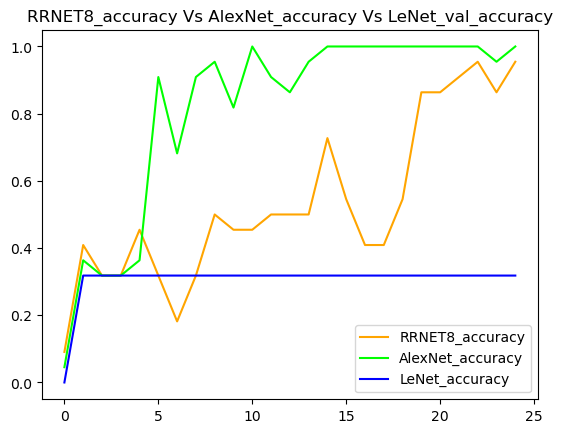

In [11]:
def plot_accuracy():
    plt.plot(comparison['RRNET8_accuracy'],color='orange',label = 'RRNET8_accuracy')
    
    plt.plot(comparison['AlexNet_accuracy'],color='lime',label = 'AlexNet_accuracy')
    
    plt.plot(comparison['LeNet_accuracy'],color='blue',label = 'LeNet_accuracy')
    
    
    plt.legend()
    plt.title('RRNET8_accuracy Vs AlexNet_accuracy Vs LeNet_val_accuracy')
    plt.show()

plot_accuracy()

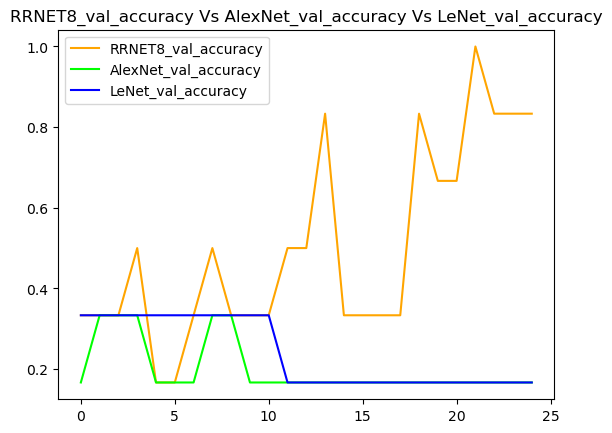

In [12]:
def plot_val_accuracy():
    plt.plot(comparison['RRNET8_val_accuracy'],color='orange',label = 'RRNET8_val_accuracy')
   
    plt.plot(comparison['AlexNet_val_accuracy'], color='lime' ,label = 'AlexNet_val_accuracy')
    
    plt.plot(comparison['LeNet_val_accuracy'],color='blue',label = 'LeNet_val_accuracy')
    
    plt.legend()
    plt.title('RRNET8_val_accuracy Vs AlexNet_val_accuracy Vs LeNet_val_accuracy')
    plt.show()

plot_val_accuracy()

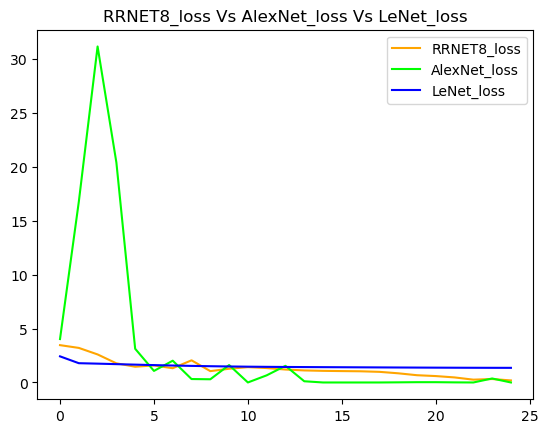

In [13]:
def plot_loss():
    plt.plot(comparison['RRNET8_loss'],color='orange',label = 'RRNET8_loss')
   
    plt.plot(comparison['AlexNet_loss'], color='lime' ,label = 'AlexNet_loss')
    
    plt.plot(comparison['LeNet_loss'],color='blue',label = 'LeNet_loss')
    
    plt.legend()
    plt.title('RRNET8_loss Vs AlexNet_loss Vs LeNet_loss')
    plt.show()
    
plot_loss()

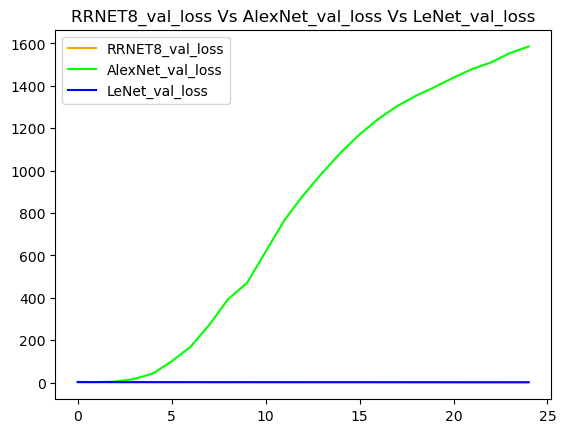

In [14]:
def plot_val_loss():
    plt.plot(comparison['RRNET8_val_loss'],color='orange',label = 'RRNET8_val_loss')
   
    plt.plot(comparison['AlexNet_val_loss'], color='lime' ,label = 'AlexNet_val_loss')
    
    plt.plot(comparison['LeNet_val_loss'],color='blue',label = 'LeNet_val_loss')
    
    plt.legend()
    plt.title('RRNET8_val_loss Vs AlexNet_val_loss Vs LeNet_val_loss')
    plt.show()
    
plot_val_loss()

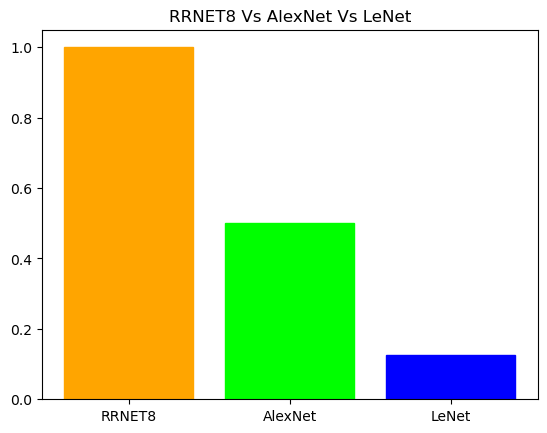

In [15]:
accuracy =[RRNET8_evaluate[1],AlexNet_evaluate[1], LeNet_evaluate[1]]
lable = ["RRNET8", "AlexNet" , "LeNet" ]

barlist = plt.bar(lable,accuracy)

barlist[0].set_color('orange')
barlist[1].set_color('lime')
barlist[2].set_color('blue')

plt.title("RRNET8 Vs AlexNet Vs LeNet")

plt.show()